In [1]:
# at line 45 decision tree starts
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bp = pd.read_csv(r"F:\carreer\Patient_with_abnormal_bloodpressure.csv")

In [3]:
bp.shape

(2000, 15)

In [4]:
bp.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [5]:
bp.Genetic_Pedigree_Coefficient.describe()

count    1908.000000
mean        0.494817
std         0.291736
min         0.000000
25%         0.240000
50%         0.490000
75%         0.740000
max         1.000000
Name: Genetic_Pedigree_Coefficient, dtype: float64

In [6]:
bp.Genetic_Pedigree_Coefficient = bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.mean())

In [7]:
bp.alcohol_consumption_per_day.describe()

count    1758.000000
mean      251.008532
std       143.651884
min         0.000000
25%       126.250000
50%       250.000000
75%       377.750000
max       499.000000
Name: alcohol_consumption_per_day, dtype: float64

In [8]:
bp.alcohol_consumption_per_day = bp.alcohol_consumption_per_day.fillna(bp.alcohol_consumption_per_day.mean())

In [9]:
bp.Pregnancy = bp.Pregnancy.fillna(bp.Pregnancy.mean())

In [10]:
bp.Pregnancy.describe()

count    2000.000000
mean        0.450226
std         0.233944
min         0.000000
25%         0.450226
50%         0.450226
75%         0.450226
max         1.000000
Name: Pregnancy, dtype: float64

In [11]:
bp.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [12]:
bp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.000000,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.450226,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.450226,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.450226,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.450226,0,15619,49644,397.000000,2,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
bp[bp.select_dtypes(include=['object']).columns]=bp[bp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [15]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   2000 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      2000 non-null   float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    2000 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [16]:
bp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.000000,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.450226,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.450226,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.450226,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.450226,0,15619,49644,397.000000,2,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_bp , test_bp = train_test_split(bp,test_size = .2)

In [19]:
train_bp_x = train_bp.iloc[: , [0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
train_bp_y = train_bp.iloc[: , 1]

In [20]:
test_bp_x = test_bp.iloc[: , [0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
test_bp_y = test_bp.iloc[: , 1]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_bp = LogisticRegression()

In [23]:
log_bp.fit(train_bp_x , train_bp_y); # model has been build

C:\Users\Shyam Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
pred = log_bp.predict(test_bp_x)

In [25]:
len(pred) # record in test data

400

In [26]:
pd.crosstab(test_bp_y , pred) 

col_0,0,1
Blood_Pressure_Abnormality,,
0,109,94
1,86,111


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
tab_bp = confusion_matrix(test_bp_y , pred)
tab_bp # from top it is predicted

array([[109,  94],
       [ 86, 111]], dtype=int64)

In [47]:
#fpr
94/(94+111)

0.4585365853658537

In [30]:
from sklearn.metrics import accuracy_score # for accuracy 

In [31]:
accuracy_score(test_bp_y , pred)

0.55

In [32]:
from sklearn.metrics import precision_score # for precision

In [33]:
precision_score(test_bp_y , pred)

0.5414634146341464

In [34]:
from sklearn.metrics import recall_score # to find recall

In [35]:
recall_score(test_bp_y , pred)

0.5634517766497462

In [36]:
from sklearn.metrics import f1_score # to find f1 ratio

In [37]:
f1_score(test_bp_y , pred)

0.5522388059701493

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [39]:
pred = log_bp.predict(test_bp_x) #pred

In [40]:
pred_prob = log_bp.predict_proba(test_bp_x) # proba mean to predict probsblity

In [41]:
roc_auc_score(test_bp_y , pred) # this is the area under the curve

0.5501987947288141

In [42]:
import matplotlib.pyplot as plt

In [43]:
# ROC CURVE
fpr , tpr , thres = roc_curve(test_bp_y , pred_prob[: , 1])  # this will return 3 things fpr tpr thres

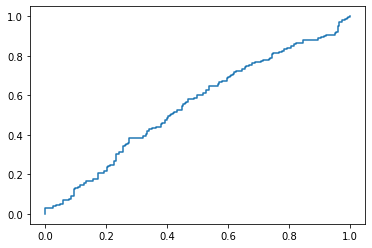

In [44]:
plt.plot(fpr , tpr) # graph of curve

In [45]:
# Decision Tree

# any model

# object 
# fit
# predict function
# way you build confution matrix will remain same`

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [ ]:
dt.fit( pass your x , y)

In [ ]:
pred = dt.predict ( x)

In [ ]:
# build the confution matrix as usual